<a href="https://colab.research.google.com/github/PeriniM/Hackathon-NOI/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Refactor Initial Datasets

In [ ]:
df = pd.read_csv('Original_datasets/DatiEnergyTemp.csv', delimiter=';')
df.head()

# substitute commas with periods in numeric columns
def replace_commas(value):
    if isinstance(value, str):
        return float(value.replace(',', '.'))
    return value

# apply the function to the dataframe except for the first column
# don't apply the function to the first column because it contains dates
for column in df.columns[1:]:
    df[column] = df[column].apply(replace_commas)

# separe the first column in two columns: date and time
df['Date'] = df['Date and time'].apply(lambda x: x.split(' ')[0])
df['Time'] = df['Date and time'].apply(lambda x: x.split(' ')[1])

# remove the first column
df = df.drop(['Date and time'], axis=1)

# place the date and time columns in the first position
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]

# split the date column in day, month and year
df['Year'] = df['Date'].apply(lambda x: x.split('/')[2])
df['Month'] = df['Date'].apply(lambda x: x.split('/')[1])
df['Day'] = df['Date'].apply(lambda x: x.split('/')[0])

# remove the date column and place the year, month and day columns in the first position
df = df.drop(['Date'], axis=1)
cols = df.columns.tolist()
cols = cols[-3:] + cols[:-3]
df = df[cols]

In [ ]:
df = pd.read_csv('Original_datasets/Photovoltaic-185kW-PV-plant.csv')
df.head()

# change the time in column Timestamp from HH:MM:SS+1 to HH:MM
df['Timestamp'] = df['Timestamp'].str[:5]
df.head()

# save the new dataset with ; as separator
df.to_csv('Original_datasets/Photovoltaic-185kW-PV-plant.csv', sep=';', index=False)

### DatiEnergyTemp Dataset

#### Overview

In [ ]:
df = pd.read_csv('Original_datasets/DatiEnergyTemp.csv', delimiter=';')
df.head()

,Year,Month,Day,Time,Indoor Temp room 1 (C),Indoor Temp room 2 (C),Indoor Temp room 3 (C),External temperature (C),Flat energy (kWh),Builing energy (kWh),Surface
0,21,1,10,01:00,21.70,21.34,21.33,NaN,0.09,0.66,417.0
1,21,1,10,02:00,21.69,21.33,21.28,NaN,0.09,0.65,417.0
2,21,1,10,03:00,21.60,21.31,21.23,NaN,0.09,0.65,417.0
3,21,1,10,04:00,21.57,21.22,21.22,NaN,0.09,0.65,417.0
4,21,1,10,05:00,21.53,21.23,21.14,NaN,0.09,0.65,417.0


In [ ]:
# Check for missing values
print(df.isnull().sum())

Year                          0
Month                         0
Day                           0
Time                          0
Indoor Temp room 1 (C)        0
Indoor Temp room 2 (C)        0
Indoor Temp room 3 (C)        0
External temperature (C)    684
Flat energy (kWh)             0
Builing energy (kWh)          0
Surface                       0
dtype: int64


In [ ]:
df['Time'] = df['Time'].apply(lambda x: x + ':00')
# Remove rows where 'External temperature (C)' is null
df = df.dropna(subset=['External temperature (C)'])

# Combine 'Year', 'Month', 'Day', and 'Time' columns to create a datetime column
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Time']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d-%H:%M:%S')

# Drop the individual date and time columns
df.drop(['Year', 'Month', 'Day', 'Time'], axis=1, inplace=True)

# Set the 'Datetime' column as the index
df.set_index('Datetime', inplace=True)

In [ ]:
df.head()

,Indoor Temp room 1 (C),Indoor Temp room 2 (C),Indoor Temp room 3 (C),External temperature (C),Flat energy (kWh),Builing energy (kWh),Surface
Datetime,,,,,,,
2021-01-11 00:00:00,20.16,17.51,16.13,10.84,2.51,2.68,417.0
2021-01-11 01:00:00,20.12,17.47,16.14,10.78,2.74,2.76,417.0
2021-01-11 02:00:00,20.12,17.59,16.11,10.68,2.95,2.98,417.0
2021-01-11 03:00:00,20.09,17.55,16.11,10.64,3.38,3.09,417.0
2021-01-11 04:00:00,20.18,17.58,16.21,10.61,2.73,2.75,417.0


##### Room 1

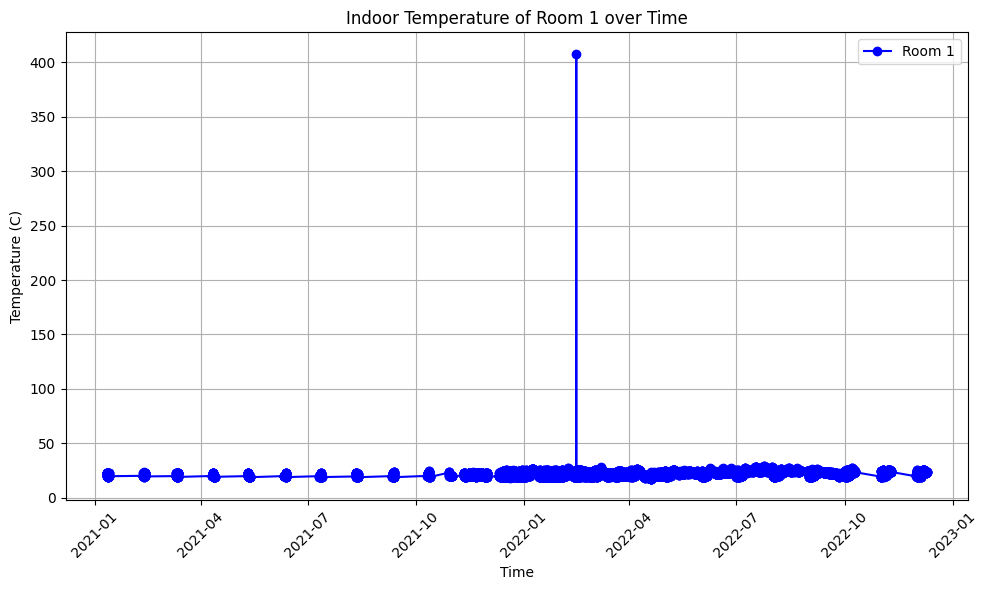

In [ ]:
# Plot indoor temperature of Room 1 over all time window
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Indoor Temp room 1 (C)'], marker='o', linestyle='-', color='b', label='Room 1')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.title('Indoor Temperature of Room 1 over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

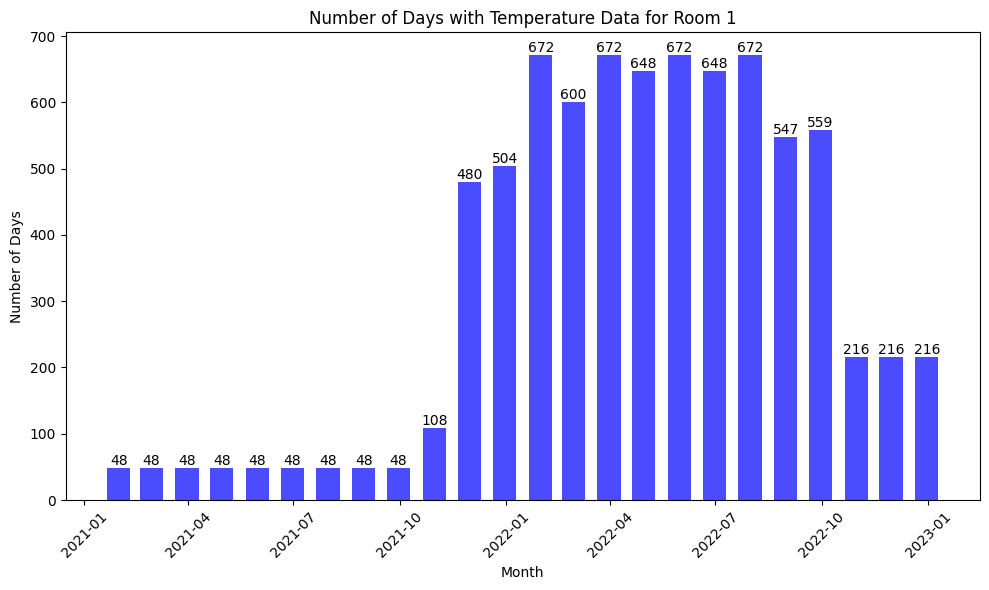

In [ ]:
# Calculate the number of values (days) for each month
monthly_counts = df['Indoor Temp room 1 (C)'].resample('M').count()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts, width=20, color='b', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.title('Number of Days with Temperature Data for Room 1')
plt.xticks(rotation=45)

# Annotate each bar with the count value
for i, count in enumerate(monthly_counts):
    plt.annotate(str(count), xy=(monthly_counts.index[i], count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

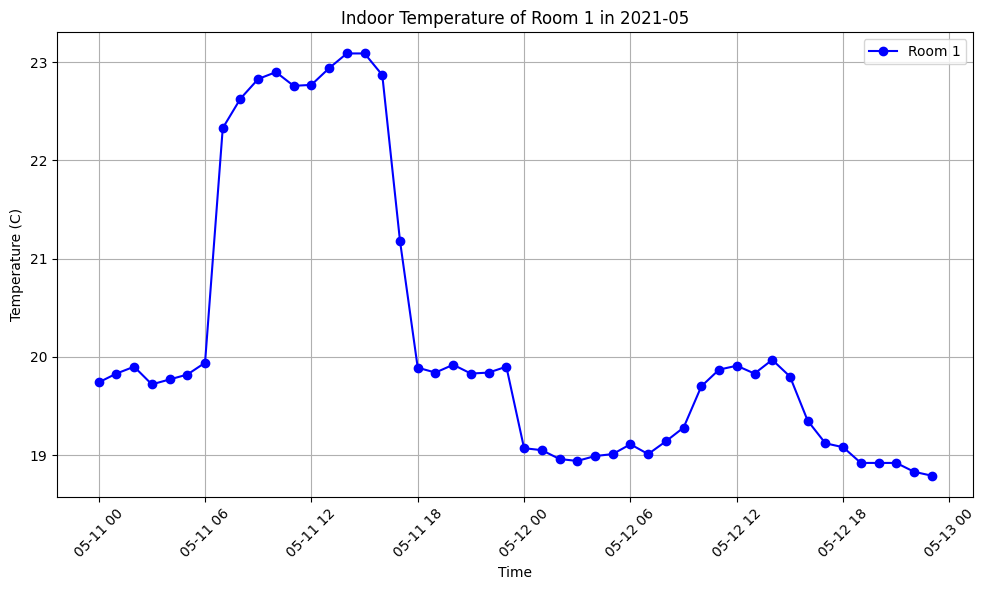

In [ ]:
# Filter data for a specific year and month
selected_year = 2021
selected_month = 5
filtered_df = df[(df.index.year == selected_year) & (df.index.month == selected_month)]

# Plot indoor temperature of Room 1 for the selected year and month
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['Indoor Temp room 1 (C)'], marker='o', linestyle='-', color='b', label='Room 1')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.title(f'Indoor Temperature of Room 1 in {selected_year}-{selected_month:02}')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Statistical Evaluation

array([[<Axes: title={'center': 'Indoor Temp room 1 (C)'}>,
        <Axes: title={'center': 'Indoor Temp room 2 (C)'}>,
        <Axes: title={'center': 'Indoor Temp room 3 (C)'}>],
       [<Axes: title={'center': 'External temperature (C)'}>,
        <Axes: title={'center': 'Flat energy (kWh)'}>,
        <Axes: title={'center': 'Builing energy (kWh)'}>],
       [<Axes: title={'center': 'Surface'}>, <Axes: >, <Axes: >]],
      dtype=object)

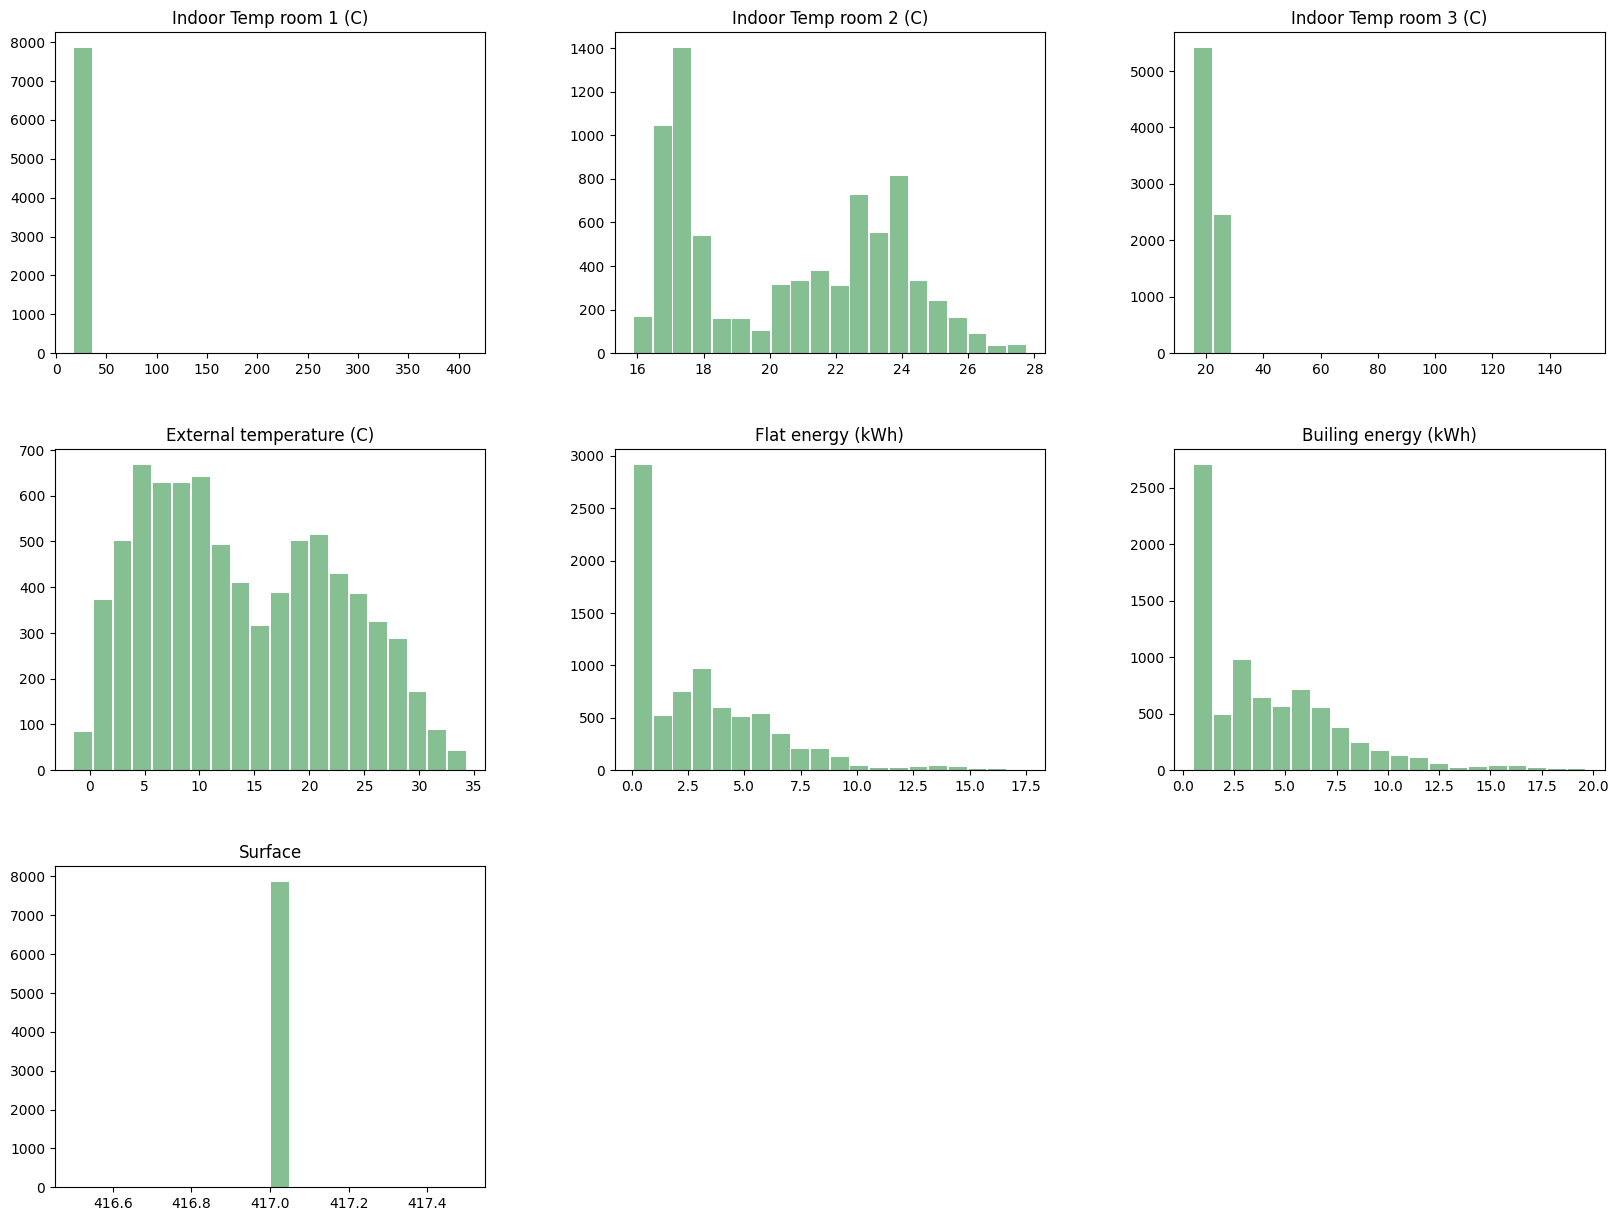

In [ ]:
from scipy import stats
df.hist(bins = 20, grid=False, color='#86bf91', rwidth=0.9, figsize=(20,15))

<Axes: >

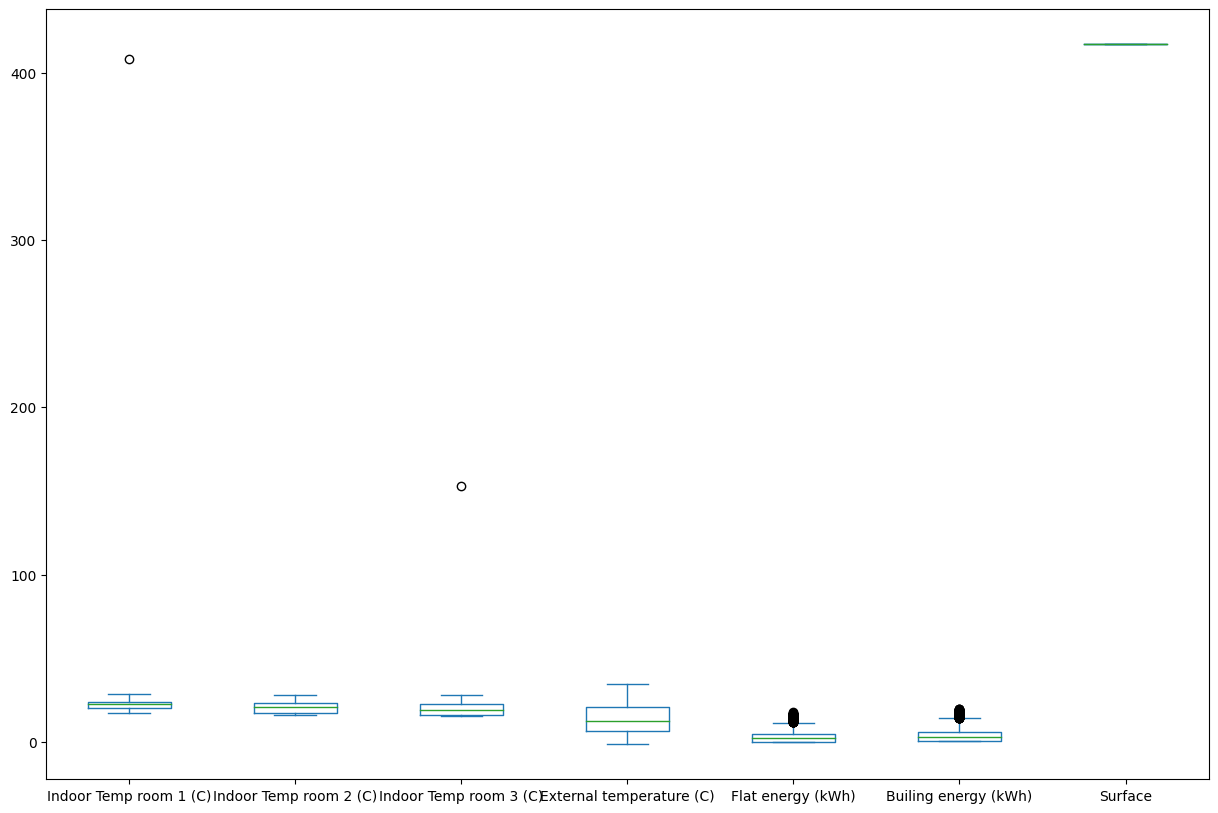

In [ ]:
df.plot(kind = 'box',figsize=(15,10))

#### Outliers Removal

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7862 entries, 2021-01-11 00:00:00 to 2022-12-09 23:00:00
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Indoor Temp room 1 (C)    7862 non-null   float64
 1   Indoor Temp room 2 (C)    7862 non-null   float64
 2   Indoor Temp room 3 (C)    7862 non-null   float64
 3   External temperature (C)  7862 non-null   float64
 4   Flat energy (kWh)         7862 non-null   float64
 5   Builing energy (kWh)      7862 non-null   float64
 6   Surface                   7862 non-null   float64
dtypes: float64(7)
memory usage: 491.4 KB


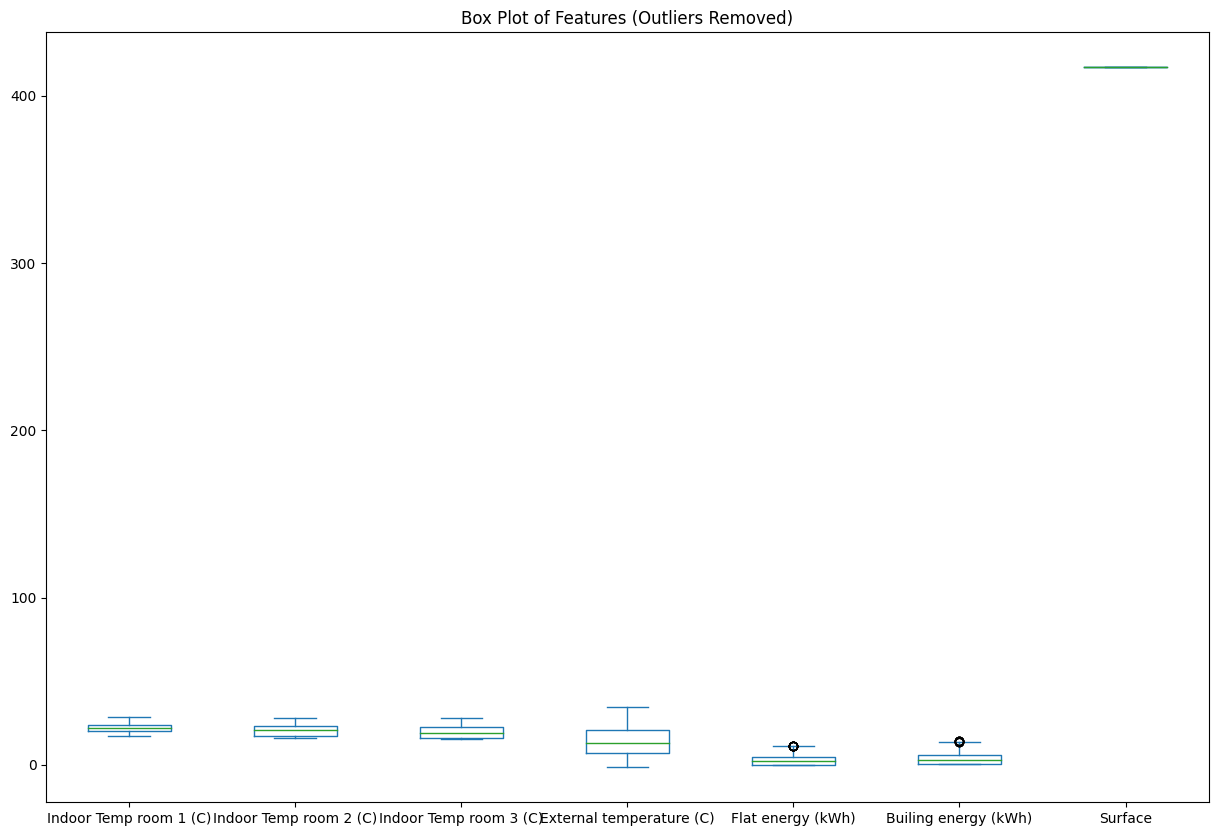

In [ ]:
# Calculate the boundaries of the confidence region (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where any feature value is outside the confidence region
filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Plot box plots of the filtered DataFrame
filtered_df.plot(kind='box', figsize=(15, 10))
plt.title('Box Plot of Features (Outliers Removed)')
plt.show()

##### Room 1 - Before and After Outlier Removal

##### Room 2 - Before and After Outlier Removal

##### Room 3 - Before and After Outlier Removal

##### Flat Energy - Before and After Outlier Removal

##### Building energy - Before and After Outlier Removal

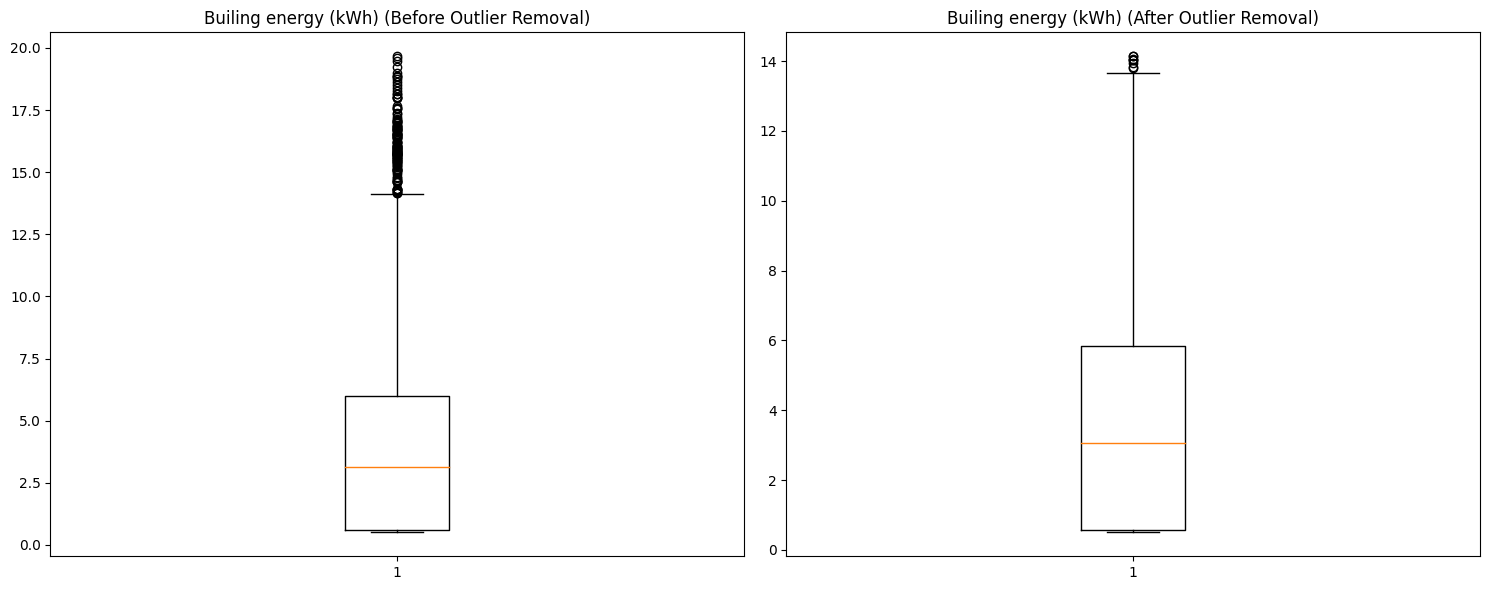

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot indoor temperature of Room 1 before removing outliers
axs[0].boxplot(df['Builing energy (kWh)'])
axs[0].set_title('Builing energy (kWh) (Before Outlier Removal)')

# Plot indoor temperature of Room 1 after removing outliers
axs[1].boxplot(filtered_df['Builing energy (kWh)'])
axs[1].set_title('Builing energy (kWh) (After Outlier Removal)')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

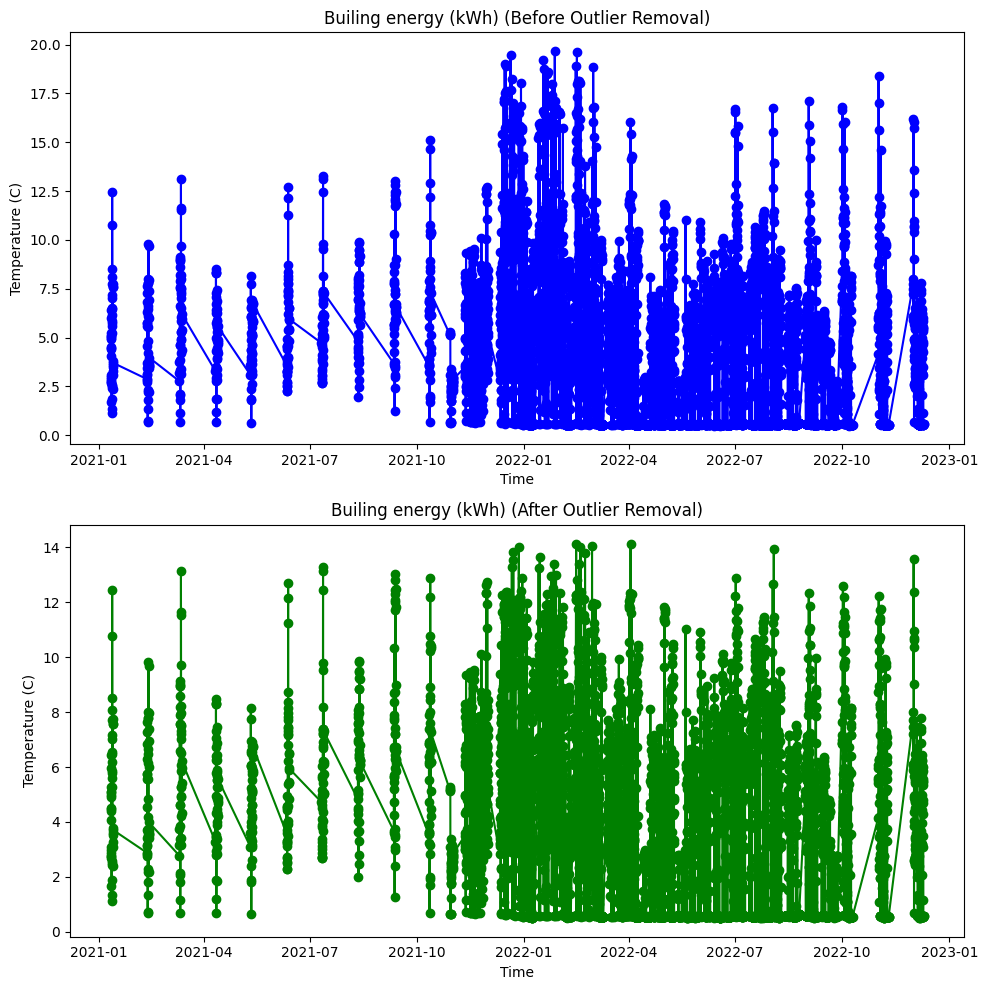

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot indoor temperature of Room 1 before removing outliers
axs[0].plot(df.index, df['Builing energy (kWh)'], marker='o', linestyle='-', color='b')
axs[0].set_title('Builing energy (kWh) (Before Outlier Removal)')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Temperature (C)')

# Plot indoor temperature of Room 1 after removing outliers
axs[1].plot(filtered_df.index, filtered_df['Builing energy (kWh)'], marker='o', linestyle='-', color='g')
axs[1].set_title('Builing energy (kWh) (After Outlier Removal)')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Temperature (C)')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

#### Correlation anaylsis

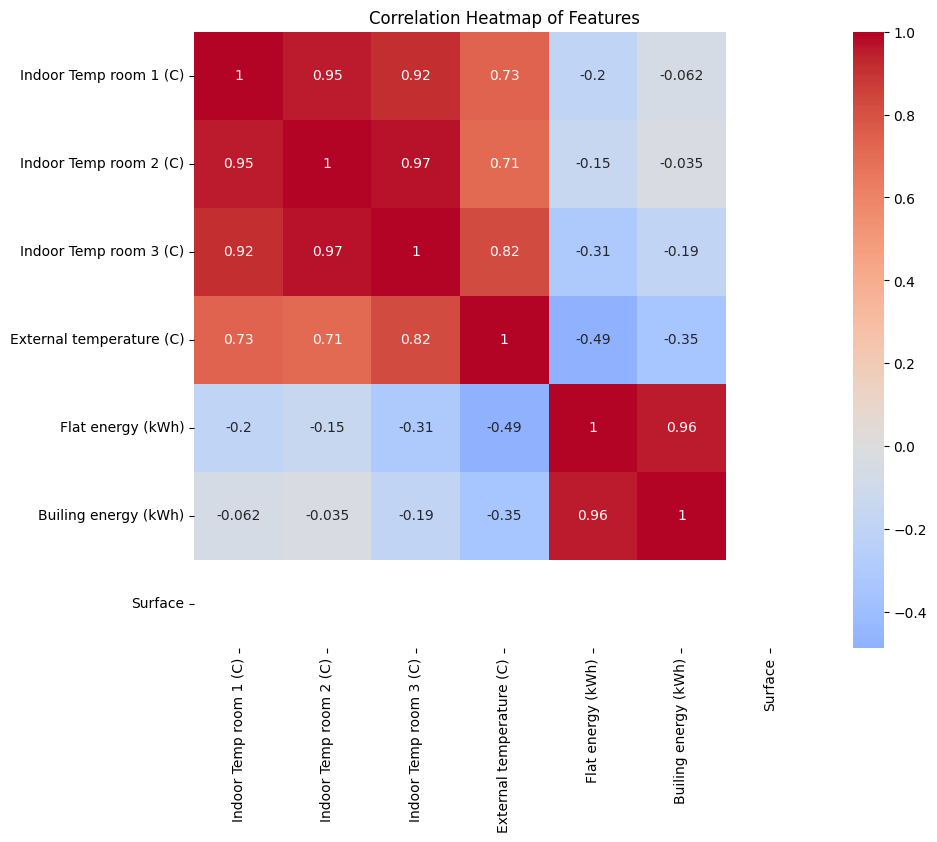

In [ ]:
# Calculate the correlation matrix
correlation_matrix = filtered_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
# drop column Surface since it is not correlated with the other features
filtered_df = filtered_df.drop(columns=['Surface'])
cleaned_df = filtered_df

#### Cleaned dataset

array([[<Axes: title={'center': 'Indoor Temp room 1 (C)'}>,
        <Axes: title={'center': 'Indoor Temp room 2 (C)'}>],
       [<Axes: title={'center': 'Indoor Temp room 3 (C)'}>,
        <Axes: title={'center': 'External temperature (C)'}>],
       [<Axes: title={'center': 'Flat energy (kWh)'}>,
        <Axes: title={'center': 'Builing energy (kWh)'}>]], dtype=object)

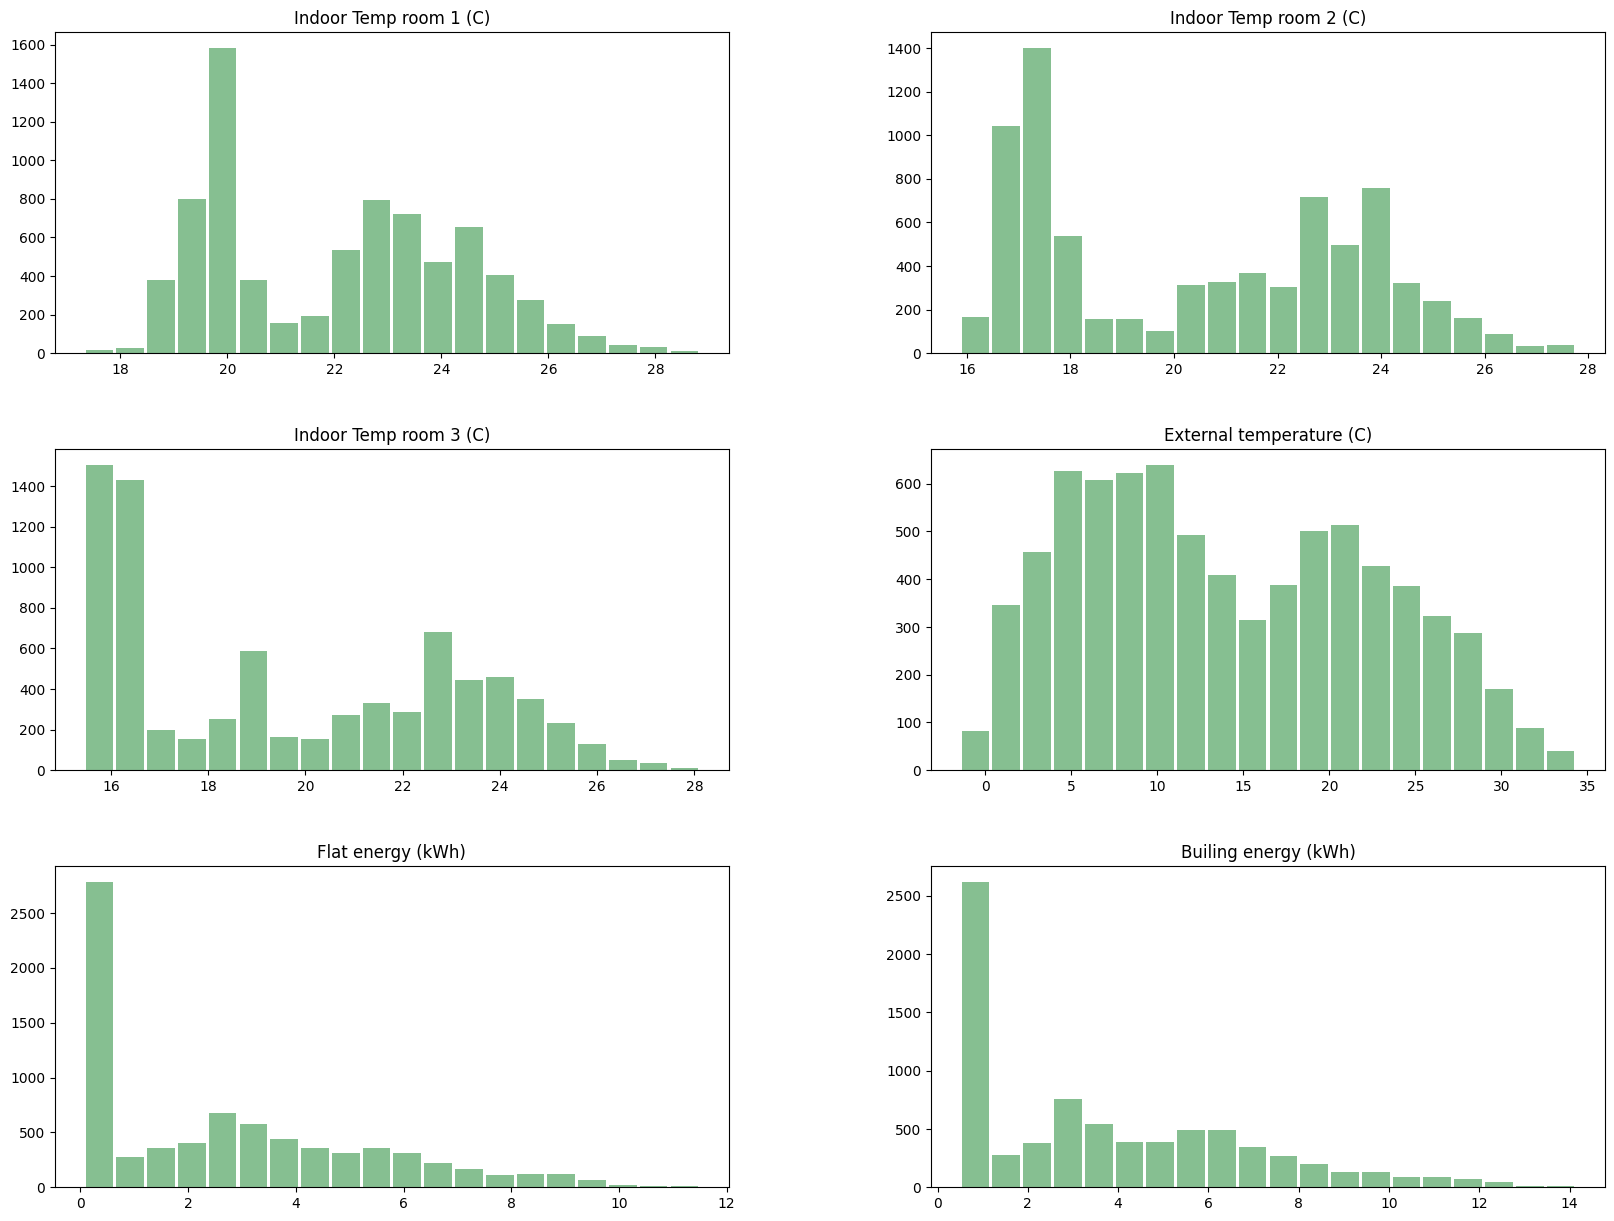

In [ ]:
cleaned_df.hist(bins = 20, grid=False, color='#86bf91', rwidth=0.9, figsize=(20,15))

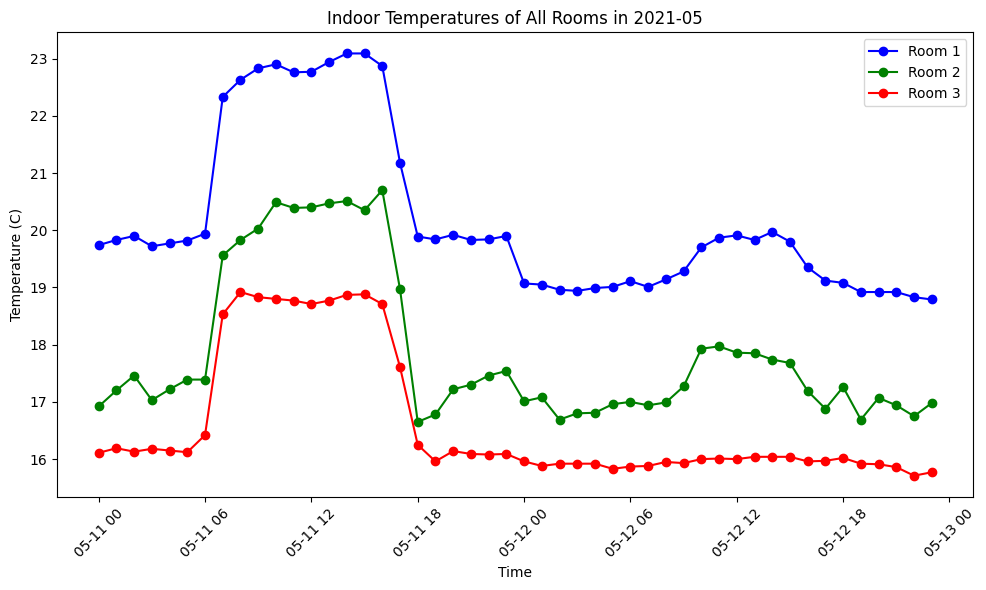

In [ ]:
# Define the specific month and year
selected_month = 5
selected_year = 2021

# Filter data for the selected month and year
reduced_df = cleaned_df[(cleaned_df.index.year == selected_year) & (cleaned_df.index.month == selected_month)]

# Plot indoor temperatures of all three rooms for the selected month and year
plt.figure(figsize=(10, 6))
plt.plot(reduced_df.index, reduced_df['Indoor Temp room 1 (C)'], marker='o', linestyle='-', color='b', label='Room 1')
plt.plot(reduced_df.index, reduced_df['Indoor Temp room 2 (C)'], marker='o', linestyle='-', color='g', label='Room 2')
plt.plot(reduced_df.index, reduced_df['Indoor Temp room 3 (C)'], marker='o', linestyle='-', color='r', label='Room 3')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.title(f'Indoor Temperatures of All Rooms in {selected_year}-{selected_month:02}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

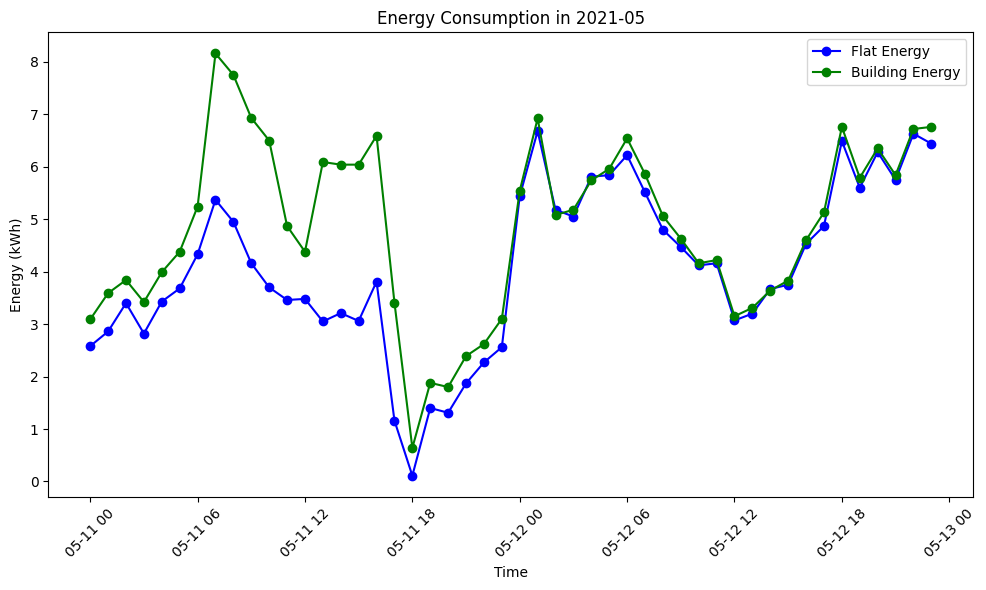

In [ ]:
selected_month = 5
selected_year = 2021

# Filter data for the selected month and year
reduced_df = cleaned_df[(cleaned_df.index.year == selected_year) & (cleaned_df.index.month == selected_month)]

# Plot energy consumption for the selected month and year
plt.figure(figsize=(10, 6))
plt.plot(reduced_df.index, reduced_df['Flat energy (kWh)'], marker='o', linestyle='-', color='b', label='Flat Energy')
plt.plot(reduced_df.index, reduced_df['Builing energy (kWh)'], marker='o', linestyle='-', color='g', label='Building Energy')
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.title(f'Energy Consumption in {selected_year}-{selected_month:02}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# save cleaned data to csv file
cleaned_df.to_csv('DatiEnergyTemp_cleaned.csv')

#### Data Augmentation

#### Forecast models

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from IPython.display import clear_output

In [5]:
if not 'cleaned_df' in locals():
  # Load your cleaned DataFrame with datetime index
  cleaned_df = pd.read_csv('DatiEnergyTemp_cleaned.csv', parse_dates=['Datetime'], index_col='Datetime')

# Choose the features you want to forecast
features = ['Indoor Temp room 1 (C)', 'Indoor Temp room 2 (C)', 'Indoor Temp room 3 (C)', 'External temperature (C)', 'Flat energy (kWh)', 'Builing energy (kWh)']

# Split data into train and test sets
train_size = int(0.8 * len(cleaned_df))
train, test = cleaned_df.iloc[:train_size], cleaned_df.iloc[train_size:]

# Normalize data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])
scaled_data = scaler.fit_transform(cleaned_df[features])

# Prepare data for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append((seq, target))
    return sequences

seq_length = 10  # Length of input sequences
train_sequences = create_sequences(train_scaled, seq_length)
test_sequences = create_sequences(test_scaled, seq_length)
sequences = create_sequences(scaled_data, seq_length)

# Prepare data for training
X_train, y_train = np.array([seq for seq, target in train_sequences]), np.array([target for seq, target in train_sequences])
X_test, y_test = np.array([seq for seq, target in test_sequences]), np.array([target for seq, target in test_sequences])


Train the model

In [ ]:
# Create a more complex LSTM model
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(128, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(128, activation='relu'),
    Dense(len(features))
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the more complex model and monitor loss
history = {'loss': [], 'val_loss': []}

for epoch in range(100):
    print(f'Epoch {epoch+1}/100')
    history_ = model.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test), verbose=1)
    history['loss'].extend(history_.history['loss'])
    history['val_loss'].extend(history_.history['val_loss'])

    # Live plot of loss
    plt.figure(figsize=(12, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Clear previous output for updated plot
    clear_output(wait=True)

# Save the trained model
model.save('trained_lstm_model.h5')

In [8]:
if not 'model' in locals():
  # Load the trained model
  model = load_model('trained_lstm_model.h5')

# Make predictions and plot them
predictions = model.predict(X_test)

# Choose the index corresponding to the feature you want to predict

# 'Indoor Temp room 1 (C)', 'Indoor Temp room 2 (C)',
# 'Indoor Temp room 3 (C)', 'External temperature (C)',
# 'Flat energy (kWh)', 'Builing energy (kWh)'

feature_name = 'Indoor Temp room 1 (C)'
feature_index = features.index(feature_name)
# Calculate the mean absolute error
mae = mean_absolute_error(scaler.inverse_transform(y_test)[:, feature_index], scaler.inverse_transform(predictions)[:, feature_index])
print(f'Mean Absolute Error: {mae:.2f}')

# Calculate the mean squared error
mse = mean_squared_error(scaler.inverse_transform(y_test)[:, feature_index], scaler.inverse_transform(predictions)[:, feature_index])
print(f'Mean Squared Error: {mse:.2f}')

# Calculate the root mean squared error
rmse = mean_squared_error(scaler.inverse_transform(y_test)[:, feature_index], scaler.inverse_transform(predictions)[:, feature_index], squared=False)
print(f'Root Mean Squared Error: {rmse:.2f}')

# Calculate the mean absolute percentage error
mape = np.mean(np.abs((scaler.inverse_transform(y_test)[:, feature_index] - scaler.inverse_transform(predictions)[:, feature_index]) / scaler.inverse_transform(y_test)[:, feature_index])) * 100
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

48/48 [==============================] - 2s 30ms/step
Mean Absolute Error: 0.27
Mean Squared Error: 0.20
Root Mean Squared Error: 0.45
Mean Absolute Percentage Error: 1.22%


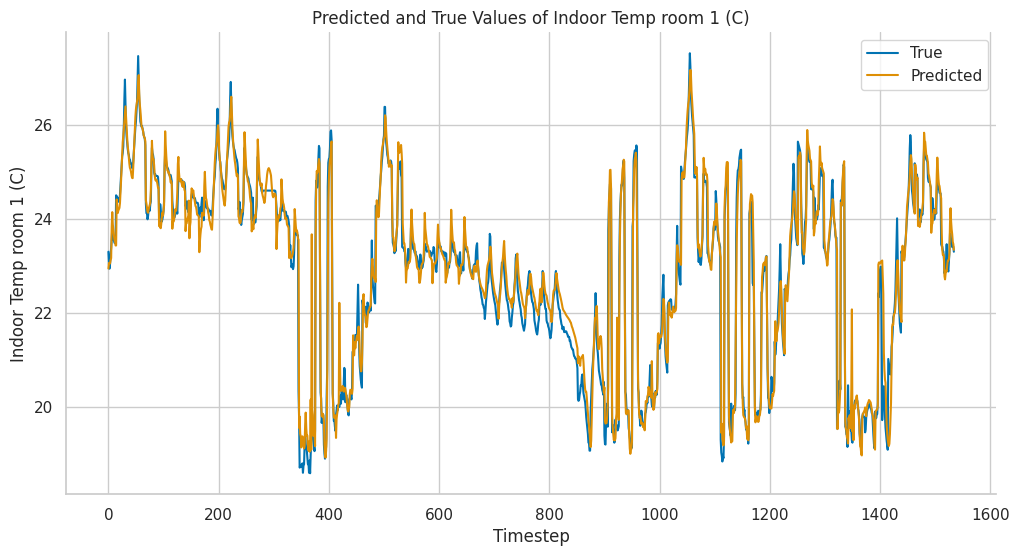

In [10]:
# plot the predicted values against the true values
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test)[:, feature_index], label='True')
plt.plot(scaler.inverse_transform(predictions)[:, feature_index], label='Predicted')
plt.xlabel('Timestep')
plt.ylabel(feature_name)
plt.title(f'Predicted and True Values of {feature_name}')
plt.legend()

# Use Seaborn to enhance the plot
sns.despine()
sns.set(style="whitegrid")
sns.set_palette("colorblind")
plt.show()

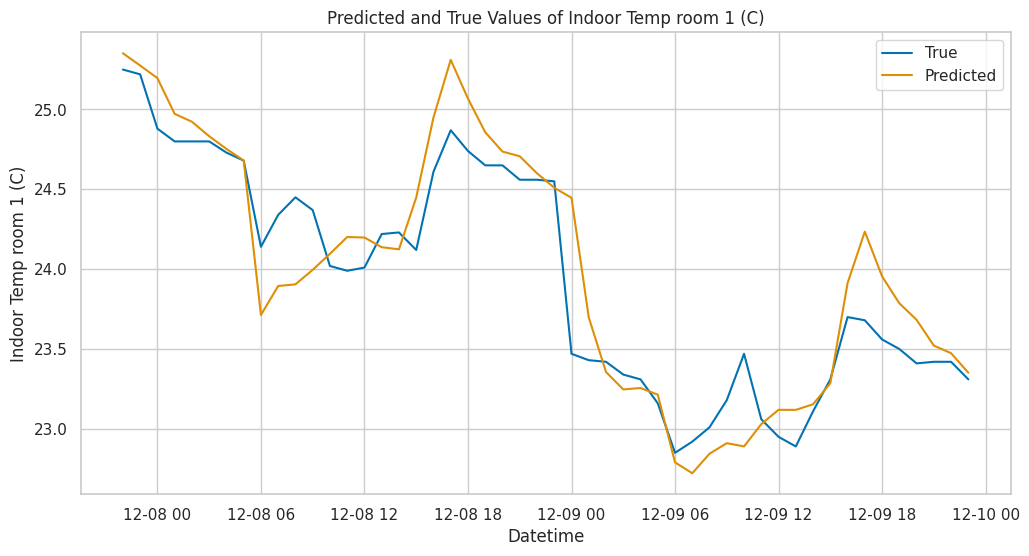

In [11]:
# plot the last 50 predicted values against the true values
# plot the last 50 true values and forecast the next 50 values
plt.figure(figsize=(12, 6))
plt.plot(test.index[-50:], scaler.inverse_transform(y_test)[-50:, feature_index], label='True')
plt.plot(test.index[-50:], scaler.inverse_transform(predictions)[-50:, feature_index], label='Predicted')
plt.xlabel('Datetime')
plt.ylabel(feature_name)
plt.title(f'Predicted and True Values of {feature_name}')
plt.legend()